# This notebook shows the basic data collection and cleaning for daily and weekly stories about the novel coronavirus outbreak for the Bucks County Courier TImes and The Intelligencer. 
# The data sources for the data are included in the code below, but generally the state data is from the Pennsylvania Department of Health and national data is from Johns Hopkins.
# You can find today's story by clicking the links to [The Intelligencer](https://bit.ly/3b5leWK) and the [Bucks County Courier Times](https://bit.ly/2XqTCai).
# We'll begin with reading in the modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline

## Pandas and matplotlib have been the main tools in my analyisi and data collection. Datetime is more so to assign today's date when I scrape from the sites.

In [21]:
# Read in the existing csv files first. Use the archive link a few lines down if you need to start from scratch.
a1=pd.read_csv("covidinfections.csv")
a2=pd.read_csv("covidtestresults.csv")

# Next the urls for the main Pennysylvania Department of Health coronvirus update page.
# The cases page has the updated information, and I read in the archive data in case I miss a day.
casesurl='https://www.health.pa.gov/topics/disease/coronavirus/Pages/Cases.aspx'
archiveurl='https://www.health.pa.gov/topics/disease/coronavirus/Pages/Archives.aspx'

# This next block reads in the table from the cases site, locates the third table in the index - our current figures- 
# then renames the blank column name labels and replaces the first row in the table. 
# For some reason, making the actual header table the column names would give me errors. This was the simplest fix.
# The last line here assigns today's date using the datetime module.
cases0=pd.read_html(casesurl)
cases1=cases0[3]
cases1=cases1.rename(columns={0:'county',1:'cases',2:'deaths'})
cases1=cases1[cases1.county!='County']
cases1['date']=date.today()

# Now we concatenate our existing table with our new one, assign the proper data types.
b1=pd.concat([a1,cases1],sort=False)
b1['cases']=b1.cases.astype(float)
b1['deaths']=b1.deaths.astype(float)
b1['date']=pd.to_datetime(b1.date)

# This is a cobination of the two blocks above for the test results, which is the first table on the DOH cases website
testresults=cases0[0]
testresults=testresults.rename(columns={0:'negative',1:'positive',2:'deaths'})
testresults=testresults[testresults.negative.str.isnumeric()]
testresults['date']=date.today() 
b2=pd.concat([a2,testresults],sort=False)
b2['deaths']=b2.deaths.astype(float)
b2['negative']=b2.negative.astype(float)
b2['positive']=b2.positive.astype(float)
b2['date']=pd.to_datetime(b2.date)
b2['total']=b2.negative+b2.positive
b2=b2.sort_values(by='date',ascending=False)

## After a spot check that the new data is correct I'll usually create a new cell to leave in markdown that will over write the previous data set. I've also been saving a separate file first to save as a daily back up.
b1.to_csv("covidinfections.csv",index=None)
b2.to_csv("covidtestresults.csv",index=None)
b1.to_csv("covidinfections11.csv",index=None)
b2.to_csv("covidtestresults11.csv",index=None)

## Finally, I like to read in the files again and make sure they are right using a quick plotting check. This includes reformating the dates, the number types, and making sure the county names are uniformly cased.

In [48]:
a1=pd.read_csv("covidinfections.csv")
a2=pd.read_csv("covidtestresults.csv")
a1['date']=pd.to_datetime(a1.date)
a1['cases']=a1.cases.replace(np.nan,0)
a1['deaths']=a1.deaths.replace(np.nan,0)
a1['deaths']=a1.deaths.astype(int)
a1['cases']=a1.cases.astype(int)
a1['date']=pd.to_datetime(a1.date)
a2['date']=pd.to_datetime(a2.date)
a1['county']=a1.county.str.title()
a1['county']=a1.county.str.title()

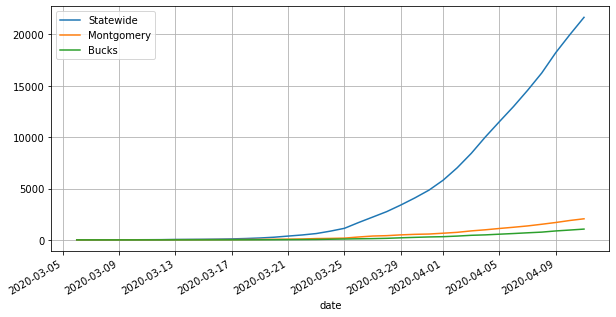

In [51]:
a1[a1.date.dt.day!=14].groupby('date').cases.sum().plot(kind='line',figsize=(10,5),grid=True,label='Statewide',legend=True)
a1[(a1.county=='Montgomery')&(a1.date.dt.day!=14)].groupby('date').cases.sum().plot(kind='line',figsize=(10,5),grid=True,label='Montgomery',legend=True)
a1[(a1.county=='Bucks')&(a1.date.dt.day!=14)].groupby('date').cases.sum().plot(kind='line',figsize=(10,5),grid=True,label='Bucks',legend=True)

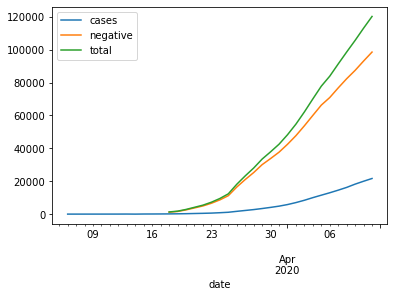

In [54]:
a1.groupby('date').cases.sum().plot(legend=True)
a2.groupby('date').negative.sum().plot(legend=True)
a2.groupby('date').total.sum().plot(legend=True)

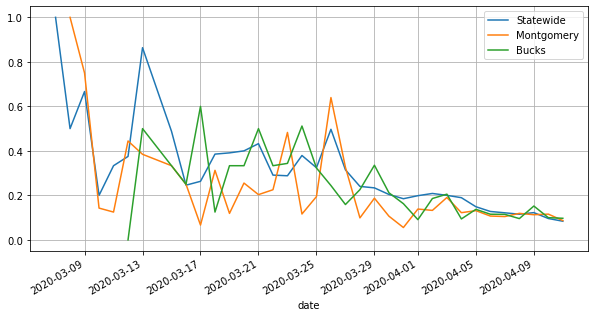

In [55]:
a1[a1.date.dt.day!=14].groupby('date').cases.sum().pct_change().plot(kind='line',figsize=(10,5),grid=True,label='Statewide',legend=True)
a1[(a1.county=='Montgomery')&(a1.date.dt.day!=14)].groupby('date').cases.sum().pct_change().plot(kind='line',figsize=(10,5),grid=True,label='Montgomery',legend=True)
a1[(a1.county=='Bucks')&(a1.date.dt.day!=14)].groupby('date').cases.sum().pct_change().plot(kind='line',figsize=(10,5),grid=True,label='Bucks',legend=True)

## This next one is a little more involved and a bit more difficult to explain.
## Essentially, I'm pulling the same data off the Johns Hopkins Github like I would the state. The problem is that every day is a new column instead of every day being a new row. There's a lot of formatting in this code chunk, but it gives us the same result as the DOH tables.

In [57]:
s1=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
s2=s1[['FIPS','1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20','4/9/20','4/10/20']].T
s2.columns=s2.iloc[0]
s2=s2[1:]
s3=s2.reset_index().rename(columns={'index':'date'})
s4=s3.T
s4.columns=s4.iloc[0]
s4=s4[1:]
s4=s4.reset_index()
s4.columns=s4.columns.str.replace("/",'_')
s4['FIPS']=s4.FIPS.astype(str)
s6=s4.set_index('FIPS').stack().to_frame().reset_index()
s6.rename(columns={0:'confirmed'},inplace=True)
s6['date']=pd.to_datetime(s6.date.str.replace("_",'/',regex=False))

## Again, I like to save a new copy of the file each time so I can just read it from there later. Typically the Johns Hopkins data is not updated over the weekend. 
## A second spot check plot...

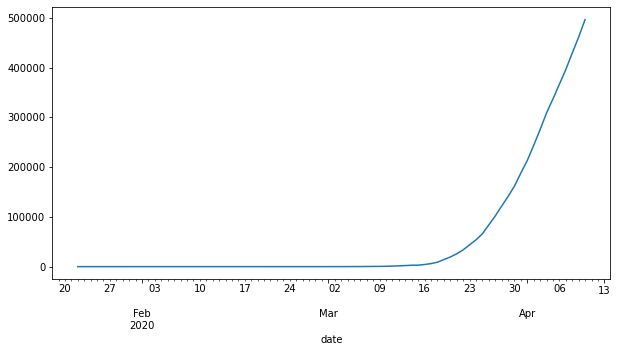

In [64]:
s6.groupby('date').confirmed.sum().plot(kind="line",figsize=(10,5))

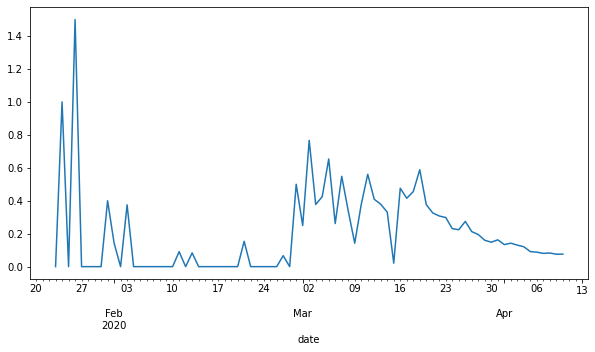

In [65]:
s6.groupby('date').confirmed.sum().pct_change().plot(kind="line",figsize=(10,5))

# From there, it's all just pondering, patience and python.

### if you have any questions you can email my at cullery@couriertimes.com.